In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

def Parameter_initialization(Net_dim):
    """
    Initialize the parameters used in both forward and backward propagation.
    We only initialize the weight and the activation neurons (treat the input 
    as 0-th layer's activation neurons) since we need to perform a bias trick,
    i.e. transfrom the funtion from 'y = W * X + b' to 'y = W * X'. 
    
    Input:
    - Net_dim: A tuple specifying the dimension of our Neural Network
    
    Outputs:
    - W: A list containing weight parameters with bias trick been performed
    - a: A list containing initialized activation neurons with bias trick been
         performed
    """    
    W = {}
    a = {}
    for i in range(len(Net_dim)):
    ###########################################################################
    # In the input layer and hidden layers, we need perform a bias trick by   #
    # creating two large enough spaces for W and a then specify a row of zeros#
    # as the last row of W (as we initialize b = 0) and a column of ones as   #
    # the last column of a.                                                   #
    # In the output layer we don't have a bias term since forward propagation #
    # stops here.                                                             #
    # Note that here we receive the training data one example at a time and   #
    # that is why we initialize a with a shape of (1,...).                    #          
    ###########################################################################    
        if i < len(Net_dim) - 1:
            W['W%d' %(i + 1)] = np.random.randn(Net_dim[i] + 1, Net_dim[i + 1])
            W['W%d' %(i + 1)][-1, :] = np.zeros((1, Net_dim[i + 1])) 
            a['a%d' %(i)] = np.zeros((1, Net_dim[i] + 1))
            a['a%d' %(i)][:, -1]=np.ones(1)
            
        else:
            a['a%d'%(i)] = np.zeros((1, Net_dim[i]))
            
    return W,a

def sigmoid(z):
    """
    Perform the sigmoid function calculation.
    """  
    return 1 / (1 + np.exp(-z))

def dsigmoid(z):
    """
    Calculate the derviative of sigmoid function.
    """ 
    return z * (1 - z)

def forward(W, a, function='cross_entropy'):
    """
    Perform the forward propagation and store results used in back propagation.
    
    Inputs:
    - W: A list containing weight parameters with bias trick been performed
    - a: A list containing initialized activation neurons with bias trick been
         performed
    - function: Loss function selected as 'cross_entropy' or 'mean_square'
    
    Outputs:
    - loss: Numerical value of loss function w.r.t one training example 
    - cache: A list storing the net input neurons and activation neurons 
    """ 
    ###########################################################################
    # Note that the output predicted y is the activation function of output   #
    # layer.                                                                  #          
    ###########################################################################    
    z = {}
    cache = {}
    for l in range(len(Net_dim) - 1):  
        z['z%d' %(l + 1)] = a['a%d' %l].dot(W['W%d' %(l + 1)])
        
        if l < len(Net_dim)-2:
            a['a%d' %(l + 1)][:, :-1] = sigmoid(z['z%d' %(l + 1)])
            
        else:
            a['a%d' %(l + 1)] = sigmoid(z['z%d' %(l + 1)])
            
    y_pred = a['a%d' %(l + 1)]
    cache['z'] = z
    cache['a'] = a
    
    if function == 'cross_entropy':
        loss = (-(1 - y)*np.log(1 - y_pred) - y * np.log(y_pred)).sum()
        
    elif function == 'mean_square':
        loss = np.square(y_pred - y).sum()
        
    return loss,cache

def backward_and_update(y, W, cache, function='cross_entropy', learning_rate =
                        4e-5):
    """
    Perform the back propagation and update weight parameters.
    
    Inputs:
    - y: The actual output in the training set
    - W: A list containing weight parameters 
    - cache: A list storing the net input neurons and activation neurons
    - function: Loss function selected as 'cross_entropy' or 'mean_square'
    - learning_rate: the step used in updating weight parameters
    
    Outputs:
    - grad: A list containing the partial derivative of loss function w.r.t net
            input, activation and weight parameters respectively
    - W: A list containing updated weight parameters
    """ 
    grad = {}
    ###########################################################################
    # Here we calculate the output layer and previous layers separately. Note # 
    # that the weight is updated once the corresponding gradient is calculated#
    # instead of being updated together after all gradients is obtained.      # 
    ###########################################################################
    idx = len(Net_dim) - 1   
    if function == 'cross_entropy':    
        grad['a%d' %idx] = (cache['a']['a%d' %idx] - y ) / \
                           (cache['a']['a%d' %idx] * 
                            (1 - cache['a']['a%d' %idx])) 
                                 
    elif function =='mean_square':
        grad['a%d' %idx] = 2.0 * (cache['a']['a%d' %idx] - y)
        
    grad['z%d' %idx] = dsigmoid(cache['a']['a%d' %idx]) * grad['a%d' %idx]
    grad['W%d' %idx] = cache['a']['a%d' %(idx - 1)].T.dot(grad['z%d' %idx])
    W['W%d' %idx] -= learning_rate * grad['W%d' %idx]                         

    for l in range(2, len(Net_dim)):
        idx = len(Net_dim)-l
        grad['a%d' %idx] = grad['z%d' %(idx + 1)].dot \
                           (W['W%d' %(idx + 1)].T)
        grad['z%d' %idx] = dsigmoid(cache['a']['a%d' %idx][:, :-1]) \
                           * grad['a%d'%idx][:, :-1]
        grad['W%d' %idx] = cache['a']['a%d' %(idx - 1)].T.dot(grad['z%d' %idx])
        W['W%d' %idx] -= learning_rate * grad['W%d' %idx]
        
    return grad, W  



0 1.5312279981887271
100 1.4763634529562275
200 1.4344460430793509
300 1.4055128426540926
400 1.3866382951730551
500 1.374239621188091
600 1.365797353843202
700 1.3598060112030785
800 1.3553882887309956
900 1.3520216494587332
1000 1.3493835825480978
1100 1.3472674369795723
1200 1.3455360538539554
1300 1.3440954582926272
1400 1.342879419521293
1500 1.3418400806316941
1600 1.3409420901163314
1700 1.340158818767582
1800 1.3394698559912723
1900 1.3388593129508453
2000 1.3383146474972938
2100 1.3378258343949818
2200 1.337384768897694
2300 1.3369848310759804
2400 1.3366205628442451
2500 1.336287425281471
2600 1.335981614010205
2700 1.3356999171321042
2800 1.3354396047525403
2900 1.3351983422281628


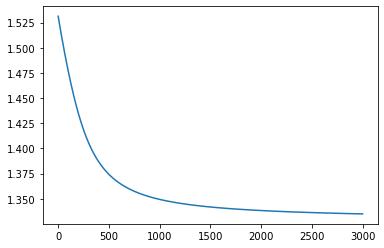

In [7]:
#############################################################################
# Set up the architecture of our neural network and initialize what we need.# 
# After we read the training data, we perform the forward, backward propaga-#
# tion and parameter updating with one example entering into our network at #
# a time. Finally, print the data loss per epoch (namely, go through all the#
# examples of the training set one time)                                    #
#############################################################################

Net_dim = [5, 4, 3, 2, 2]
W, a = Parameter_initialization(Net_dim)

loss_record=[]
#a['a0'][:,:-1]=np.random.randn(1,4)
#y = np.random.randn(1,1)
X = 2 * np.random.randn(50, Net_dim[0])
#Y = 5 + 3 * X[:,0][:,np.newaxis] + np.random.randn(50, 1)
Y = 5 + np.random.randn(50, Net_dim[-1])
#Y=np.sum(X,axis=1)
for i in range(3000):
    for n in range(50):
        loss = None
        a['a0'][:, :-1] = X[n].reshape(-1, Net_dim[0])
        y = Y[n].reshape(-1, Net_dim[-1])
        loss, cache = forward(W, a, function='mean_square')#cross_entropy
        loss += loss
        loss = loss/50
        grad, W = backward_and_update(y, W, cache, function='mean_square', learning_rate = 3e-5)
    if i % 100 == 0:
        print(i, loss)
    loss_record.append(loss)
plt.plot(loss_record)
plt.show()